In [68]:
import pandas as pd

diabetes = pd.read_csv("C:\\Users\\Jitendra Sharma\\Downloads\\archive\\diabetes.csv")

In [69]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [70]:
import numpy as np 

class Perceptron: 
    def __init__(self, learning_rate = 0.01, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y): # Number of rows - samples, columns - features.
        n_samples , n_features = X.shape
        
        #init Weights
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # convert the value to 0 or 1 for perceptron if not already
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        #
        for _ in range(self.n_iters):
        # second loop
            for idx, x_i in enumerate(X):
                linear_operator = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_operator)
                
                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update 
    
    def predict(self, X):
        linear_operator = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_operator)
        return y_predicted
        
        
    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [71]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy


In [72]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt

# Train datasets
X = diabetes.iloc[:,:7]
y = diabetes["Outcome"]
#print(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.4, random_state=42)


In [73]:
# Initialize class.
p = Perceptron(learning_rate=0.01, n_iters=5000)
p.fit(X_train ,y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", round(accuracy(y_test, predictions)*100,2))

Perceptron classification accuracy 77.27


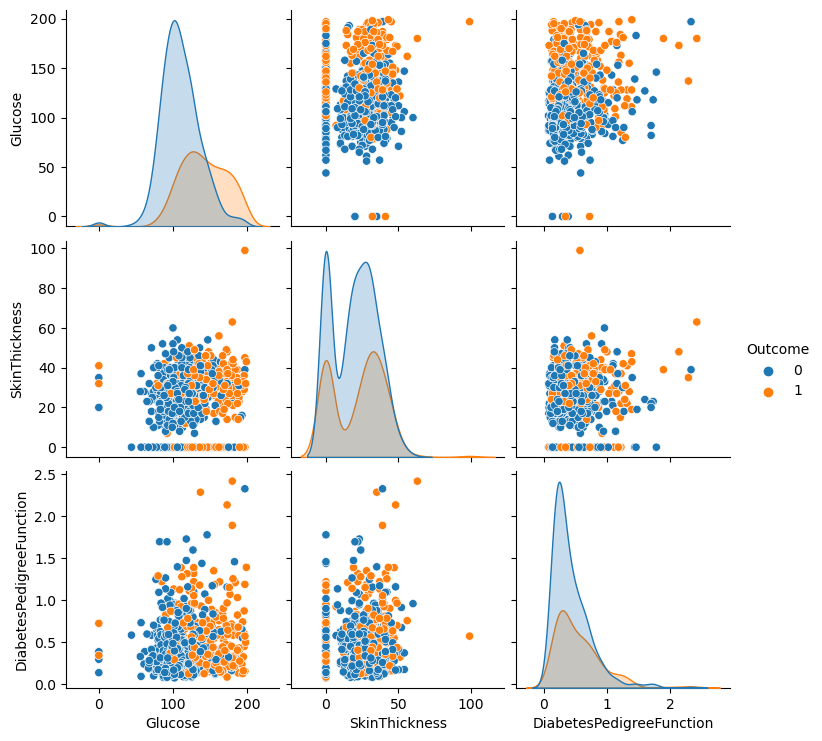

In [76]:
import seaborn as sns
sns.pairplot(data=diabetes,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

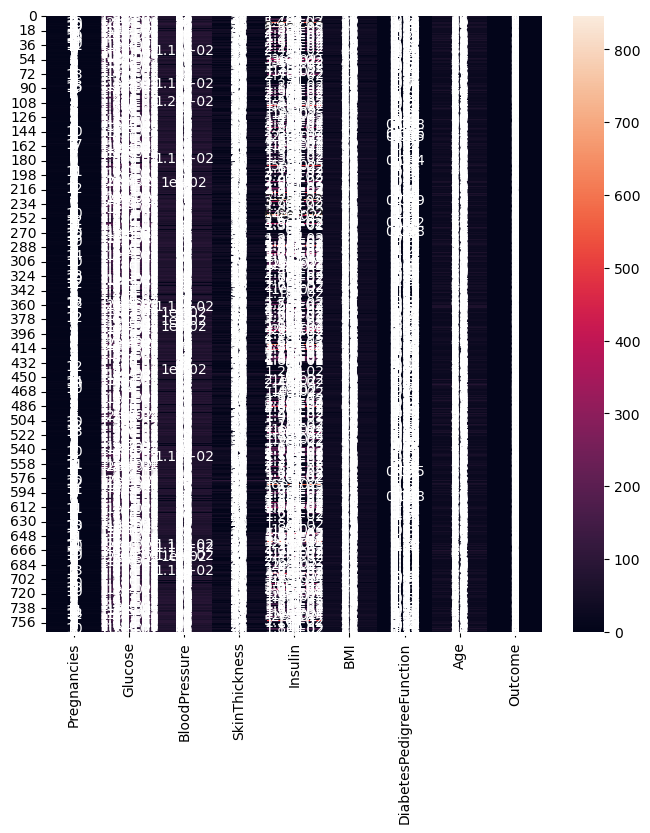

In [85]:
import matplotlib.pyplot as plt
matrix = diabetes.iloc[:,0:8].corr()
matrix
plt.figure(figsize=(8,8))
sns.heatmap(diabetes, annot = True)
plt.show()

In [89]:
from sklearn.metrics import confusion_matrix

y = y_test
ybar = predictions

con = confusion_matrix(y,ybar)
print(con)

[[165  41]
 [ 29  73]]
